Author: Ahmad Lokman Anuar

__Introduction__

APS (Air Pressure System) Failure and Operational Data for Scania Trucks. Download dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/00421/.



__Approach__

General work flow: 

0. Manual review of the data.
1. Environment setup and load dataset.
2. Descriptive Analysis to summarize data <br>
3. Data Exploration and PreProcessing
4. Apply ML classifiers 
4.5. Observe performance
5. Performance tuning
6. Finalize model & results.


## __0. Manual Review Dataset__

It is beneficial to skim through dataset manually for obvious pointers that can be rectified immediately. 

Upon inspection, the dataset is in CSV format and contains non-tabulated header paragraph that will interfere with downstream processing. 

Hence, the header paragraph is manually deleted.

## __1. Set up environment__

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl

from datetime import datetime
from matplotlib import pyplot

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



First, we load CSV (directory sensitive) to dataframe.

In [2]:
startTimeScript = datetime.now()

file_path_train = 'aps_failure_training_set.csv' #directory of training dataset
df_train = pd.read_csv(file_path_train, na_values="na") #write csv into dataframe 

file_path_test = 'aps_failure_test_set.csv'
df_test = pd.read_csv(file_path_test, na_values="na")

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

View top 5 row in training dataset

In [ ]:
df_train.head() #view top 5 of training dataset 

View top 5 row in test dataset.

In [ ]:
df_test.head() #view top 5 of training dataset 

## __2. Descriptive Analysis.__

Before delving deeper, we apply several Descriptive Analysis to know the state and condition of our dataset.

### __2.1 Size of dataset.__

In [3]:
print("----- Size of Dataset -----")
print(f"Train : {df_train.shape} | Test : {df_test.shape}")

Train : (60000, 171) | Test : (16000, 171)


### __2.2 General Description of Dataset.__

In [4]:
print("----- Dataset Statistics -----")
print(df_train.describe())

----- Dataset Statistics -----
             aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04   
std      209.792592 

### __2.3 Class Distribution.__

In [5]:
print("----- Class Distibution -----")
print("Number of positive classes = ", sum(df_train['class'] == 'pos'))
print("Number of negative classes = ", sum(df_train['class'] == 'neg'))

Number of positive classes =  1000
Number of negative classes =  59000


### __2.4 Any Missing Values?__

In [6]:
print("----- Train Data: Missing Values Count by Attributes -----")
print(df_train.isnull().sum())

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
ax_000     2501
ay_000      671
ay_001      671
ay_002      671
ay_003      671
ay_004      671
ay_005      671
ay_006      671
ay_007      671
ay_008      671
ay_009      671
az_000      671
az_001      671
az_002      671
az_003      671
az_004      671
az_005      671
az_006      671
az_007      671
az_008      671
az_009      671
ba_000      688
ba_001      688
ba_002      688
ba_003      688
ba_004      688
ba_005      688
ba_006      688
ba_007      688
ba_008      688
ba_009  

In [7]:
print("----- Test Data: Missing Values Count by Attributes -----")
print(df_test.isnull().sum())

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
ae_000      690
af_000      690
ag_000      189
ag_001      189
ag_002      189
ag_003      189
ag_004      189
ag_005      189
ag_006      189
ag_007      189
ag_008      189
ag_009      189
ah_000      175
ai_000      163
aj_000      163
ak_000     1198
al_000      169
am_0        163
an_000      169
ao_000      162
ap_000      169
aq_000      162
ar_000      764
as_000      163
at_000      163
au_000      163
av_000      688
ax_000      688
ay_000      192
ay_001      192
ay_002      192
ay_003      192
ay_004      192
ay_005      192
ay_006      192
ay_007      192
ay_008      192
ay_009      192
az_000      192
az_001      192
az_002      192
az_003      192
az_004      192
az_005      192
az_006      192
az_007      192
az_008      192
az_009      192
ba_000      193
ba_001      193
ba_002      193
ba_003      193
ba_004      193
ba_005      193
ba_006      193
ba_007      193
ba_008      193
ba_009  

## __3. Preprocessing.__

With the knowledge about the dataset conditions obtained from exploratory analysis in prior phase, we will process dataset accordingly to manage features and mitigate unfavorable factors such as outliers, missing values and imbalance that can affect downstream works.

### __3.1 Feature Engineering.__

From the dataset description, it is understood that there would be only two classes ("neg" and "pos"), so we will treat it as binary classification problem and substitute class -> neg to 0 and pos to 1.

In [8]:
# Replace class labels with integer values (neg = 0, pos = 1) in training and test data-set
df_train['class'].replace({
    'neg': 0,
    'pos': 1
}, inplace=True)
df_test['class'].replace({
    'neg': 0,
    'pos': 1
}, inplace=True)

We observe the 'class' values that has been changed to 0 and 1 as follows.

In [9]:
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,Na

### __3.2 Manage Missing Values.__

We impute all missing values that are present with mean values from each columns. 

Several other strategies can be applied, such as removal of columns with NAs that exceed threshold composition, or impute the NAs with other values (0,1,median,etc).

In [14]:
# Fill missing values in training and test dataset
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [15]:
#Check dataset size
print(f"Train : {df_train.shape} | Test : {df_test.shape}")

Train : (60000, 171) | Test : (16000, 171)


We verify that no missing values still present in the dataset

In [16]:
print(df_train.isnull().sum())

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
ak_000    0
al_000    0
am_0      0
an_000    0
ao_000    0
ap_000    0
aq_000    0
ar_000    0
as_000    0
at_000    0
au_000    0
av_000    0
ax_000    0
ay_000    0
ay_001    0
ay_002    0
ay_003    0
ay_004    0
ay_005    0
ay_006    0
ay_007    0
ay_008    0
ay_009    0
az_000    0
az_001    0
az_002    0
az_003    0
az_004    0
az_005    0
az_006    0
az_007    0
az_008    0
az_009    0
ba_000    0
ba_001    0
ba_002    0
ba_003    0
ba_004    0
ba_005    0
ba_006    0
ba_007    0
ba_008    0
ba_009    0
bb_000    0
bc_000    0
bd_000    0
be_000    0
bf_000    0
bg_000    0
bh_000    0
bi_000    0
bj_000    0
bk_000    0
bl_000    0
bm_000    0
bn_000    0
bo_000    0
bp_000    0
bq_000    0
br_000    0
bs_000    0
bt_000    0
bu_000    0
bv_0

### __3.3 Address Unbalanced Data.__

Recall unbalanced data class of negative and positive:

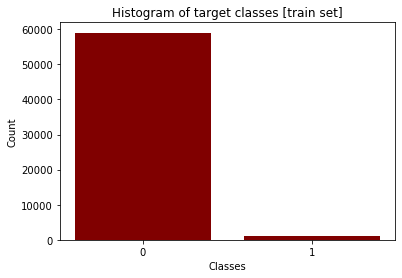

In [17]:
pyplot.close('all')
bins = np.bincount(df_train['class'].values)
pyplot.bar([0,1], bins, color='maroon')
pyplot.xticks([0,1])
pyplot.xlabel('Classes')
pyplot.ylabel('Count')
pyplot.title('Histogram of target classes [train set]')
pyplot.show()


This is an imbalance class where the positive (1) target variable is much lesser than the negative (0). However, we can treat this imbalance dataset using SMOTE (Synthetic Minorty OverSampling Technique), a method to oversample minority class in out dataset.

Other options to balance class ratio is to undersample majority class, using different sampling algorithms.

In [96]:
# Extract features and labels from the training and test data-set
y_train = df_train.loc[:, 'class']
x_train = df_train.drop('class', axis=1)
x_test = df_test.drop('class', axis=1)
y_test = df_test.loc[:, 'class']

print("X_train.shape: {} Y_train.shape: {}".format(x_train.shape, y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(x_test.shape, y_test.shape))


X_train.shape: (60000, 170) Y_train.shape: (60000,)
X_validation.shape: (16000, 170) Y_validation.shape: (16000,)


In [105]:
#  Synthetic Minority Oversampling Technique to balance the training data-set
sm = SMOTE()
x_train, y_train = sm.fit_sample(x_train, y_train)

Let us check oversampling effect to our dataset size:

In [115]:
print(f"Train : {y_train.shape} | Test : {y_test.shape}")

Train : (118000,) | Test : (16000,)


To check number of classes after oversampling,

In [111]:
y_train_smoted = y_train.to_frame()
y_train_smoted["class"].value_counts()

1    59000
0    59000
Name: class, dtype: int64

Or as in histogram:

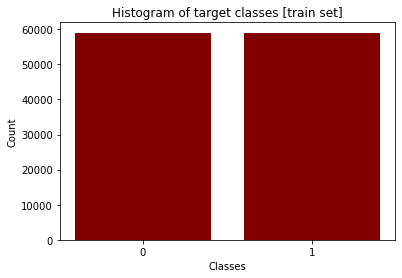

In [116]:
pyplot.close('all')
bins = np.bincount(y_train_smoted['class'].values)
pyplot.bar([0,1], bins, color='maroon')
pyplot.xticks([0,1])
pyplot.xlabel('Classes')
pyplot.ylabel('Count')
pyplot.title('Histogram of target classes [train set]')
pyplot.show()


The dataset has been considerably inflated to equal amount of positive and negative cases (59000 each).

Here we have completed Pre-Processing of our dataset:
- No missing values, all has been imputated with Mean.
- No imbalanced data class, Oversampling of minority class balanced the composition.

The data is fit to be implemented with ML classifiers.

## 4. Apply ML Classifiers

Set test options and evaluation metric

In [72]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [75]:
from sklearn.linear_model import LogisticRegression
seedNum = 1234 #seed number to allow reproducibility

# Set up Algorithms package to test 
models = []

#Algorithms to be tested here are LG,GaussianNB,Random Forest, and GB using default parameters
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))

results = [] #init
names = [] #init
metrics = [] #init

In [77]:
#Generate models stat in order
for name, model in models:
    startTimeModule = datetime.now()
    #kfold used as method to compute weights across iterations
    kfold = KFold(n_splits=num_folds, random_state=seedNum, shuffle=True)
    #crossvalidate kfold and score 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

e:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
e:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

LR: 0.944881 (0.002182)
Model training time: 0:01:04.733439
NB: 0.919449 (0.002928)
Model training time: 0:00:11.981912
RF: 0.996754 (0.000685)
Model training time: 0:29:45.109658
GBM: 0.985102 (0.000563)
Model training time: 0:53:28.020762
Average metrics (accuracy) from all models: 0.9615466101694916


### 4.5 Compare performance of algorithms

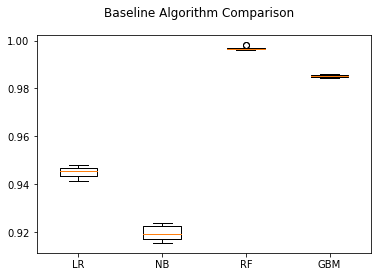

In [78]:
fig = pyplot.figure()
fig.suptitle('Baseline Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Random Forrest classifier outperforms other algorithm, reporting 99.67% accuracy. Hence RF will be used to predictive analysis with the test data.

### 5. Improving accuracy

Hyperparameter tuning to find best parameters for Random Forrest classifiers. For this demonstration, we will perform tuning to find n Decision Tree branch that yields the best performance. 

We set the n_estimator parameter for RF to compute n of 75, 100, 125, 150, 175.

In [80]:
# Initialize RF result array
results = []
names = []

# Tuning algorithms  
startTimeModule = datetime.now()
#Here we try to find best n_estimator, we can define other RF params in dict to invoke tuning as well
paramGrid1 = dict(n_estimators=np.array([75,100,125,150,175])) #num of decision trees to try
model1 = RandomForestClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seedNum)
#compound  cross validate values for hyperparameter tuning
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold) 
grid_result1 = grid1.fit(x_train, y_train) #actualparamtraining

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.996763 using {'n_estimators': 150}
0.996627 (0.000635) with: {'n_estimators': 75}
0.996754 (0.000685) with: {'n_estimators': 100}
0.996746 (0.000679) with: {'n_estimators': 125}
0.996763 (0.000667) with: {'n_estimators': 150}
0.996754 (0.000635) with: {'n_estimators': 175}
Model training time: 1:47:30.342090


For the hyperparameter tuning results, we found that value of  n_estimators parameter that returns highest accuracy is 150. Hence we will use this knowledge to tune our Random Forrest algorithm to run with test data.

### 6. Finalize model

We will retrain the classifier using our training dataset with best parameter ('n_estimators'=150) to build an optimal model. This optimum model will be used to predict from test dataset.

Creating standalone model using the tuned parameters
Saving an optimal model to file or blob for later use.

6.1. Prediction for test set

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Use best parameter along with the model of choice to the test dataset
model = RandomForestClassifier(n_estimators=150, random_state=seedNum)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9869375
[[15474   151]
 [   58   317]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.68      0.85      0.75       375

    accuracy                           0.99     16000
   macro avg       0.84      0.92      0.87     16000
weighted avg       0.99      0.99      0.99     16000



6.2. Create standalone model on entire training dataset

In [122]:
#Training RF model with best params found to finalize
startTimeModule = datetime.now()
finalModel = RandomForestClassifier(n_estimators=150, random_state=seedNum)
finalModel.fit(x_train, y_train)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:02:51.757520


6.3 Save model for later use

In [124]:
#modelName = 'finalModel_BinaryClass.sav'
#dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 7:17:41.484371


Challenge Metric

In [126]:
cm = confusion_matrix(y_test, predictions).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['TN', 'FP', 'FN', 'TP'])

total_cost = 10*(cm.FP[0]) + 500*(cm.FN[0])
print(f"Total cost for RF model is {total_cost}")

Total cost for RF model is 30510
